In [1]:
#ucitavanje biblioteka
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import neighbors
from math import sqrt

In [2]:
#ucitavanje dataset-a
df = pd.read_csv('Bike Sharing.csv')

In [3]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446   331.0       654.0   
1           2  0.363478  0.353739  0.696087   0.248539   131.0       670.0   
2           1  0.196364  0.189405  0.437273   0.248309   120.0      1229.0   
3           1  0.200000  0.212122  0.590435        NaN   108.0      1454.0   
4           1  0.226957  0.229270  0.436957   0.186900    82.0      1518.0   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
#tipovi podataka
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt             int64
dtype: object

In [5]:
#deskriptivna statistika
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  729.000000  728.000000  730.000000  728.000000   
mean     0.683995    1.395349    0.494953    0.474203    0.627809    0.190449   
std      0.465233    0.544894    0.182968    0.162960    0.142508    0.077456   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.336667    0.337891    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.485158    0.626250    0.180975   
75%      1.000000    2.000000    0.655000    0.608289    0.730313    0.233211   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   729.000000   730.000000   731.000000  
mean    848.791495  3654.549315  4504.348837  
std     687.415068  1560.708499  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.000000  2495.000000  3152.000000  
50%     713.000000  3660.000000  4548.000000  
75%    1097.000000  4759.750000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
#provera null vrednosti
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          2
atemp         3
hum           1
windspeed     3
casual        2
registered    1
cnt           0
dtype: int64

In [7]:
#broj redova i kolona
df.shape

(731, 16)

In [8]:
#izbacivanje redova u kojima bar jedna kolona ima null vrednost
df = df.dropna(how='any')

In [9]:
#broj redova i kolona nakon izbacivanja null vrednosti
df.shape

(719, 16)

In [10]:
#nazivi kolona
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
#uzimanje u obzir samo numerickih podataka (izbacivanje datuma)
df_numeric = df.select_dtypes(include = ['int64', 'float64'])

In [12]:
df_numeric.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [13]:
#izbacivanje outlier-a
z = np.abs(stats.zscore(df_numeric))

threshold = 3
df_numeric = df_numeric[(z < threshold).all(axis=1)]

In [14]:
df_numeric.shape

(688, 15)

In [15]:
#izbacivanje kolone koja je id
y=df_numeric[['cnt']]
y
df_numeric = df_numeric.drop(columns=['instant', 'cnt','casual','registered'])


In [16]:
df_numeric.head()

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
4       1   0     1        0        3           1           1  0.226957   
5       1   0     1        0        4           1           1  0.204348   

      atemp       hum  windspeed  
0  0.363625  0.805833   0.160446  
1  0.353739  0.696087   0.248539  
2  0.189405  0.437273   0.248309  
4  0.229270  0.436957   0.186900  
5  0.233209  0.518261   0.089565

In [17]:
#normalizacija podataka
scaler = MinMaxScaler()
scaler.fit(df_numeric)
df_normalized = scaler.transform(df_numeric)

In [18]:
#kastovanje dobijenih normalizovanih podataka u dataframe
df_normalized = pd.DataFrame(df_normalized)
df_normalized.columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

In [19]:
#normalizovani dataframe
df_normalized.head()

season   yr  mnth  holiday   weekday  workingday  weathersit      temp  \
0     0.0  0.0   0.0      0.0  1.000000         0.0         0.5  0.355170   
1     0.0  0.0   0.0      0.0  0.000000         0.0         0.5  0.379232   
2     0.0  0.0   0.0      0.0  0.166667         1.0         0.0  0.171000   
3     0.0  0.0   0.0      0.0  0.500000         1.0         0.0  0.209120   
4     0.0  0.0   0.0      0.0  0.666667         1.0         0.0  0.180948   

      atemp       hum  windspeed  
0  0.373517  0.760765   0.345236  
1  0.360541  0.603235   0.565533  
2  0.144830  0.231732   0.564958  
3  0.197158  0.231278   0.411391  
4  0.202329  0.347983   0.167983

In [20]:
#deskriptivna statistika normalizovanih podataka
df_normalized.describe()

season          yr        mnth  holiday     weekday  workingday  \
count  688.000000  688.000000  688.000000    688.0  688.000000  688.000000   
mean     0.502422    0.495640    0.503039      0.0    0.500242    0.710756   
std      0.369018    0.500345    0.312642      0.0    0.333030    0.453741   
min      0.000000    0.000000    0.000000      0.0    0.000000    0.000000   
25%      0.333333    0.000000    0.272727      0.0    0.166667    0.000000   
50%      0.666667    0.000000    0.545455      0.0    0.500000    1.000000   
75%      0.666667    1.000000    0.750000      0.0    0.833333    1.000000   
max      1.000000    1.000000    1.000000      0.0    1.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  
count  688.000000  688.000000  688.000000  688.000000  688.000000  
mean     0.197674    0.544385    0.519527    0.507333    0.417477  
std      0.271436    0.228865    0.214518    0.200347    0.191220  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.346603    0.339738    0.350479    0.279545  
50%      0.000000    0.550903    0.537599    0.504187    0.392683  
75%      0.500000    0.743521    0.696319    0.652064    0.525898  
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [21]:
df_normalized.shape

(688, 11)

In [22]:
data=df_normalized
y=y['cnt']

In [23]:
#podela dataset-a na train i test
X_train, X_holdout, y_train, y_holdout = train_test_split(data.values, y, test_size=0.3,random_state=2018)

In [24]:
#analiza glavnih komponenti
pca = decomposition.PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

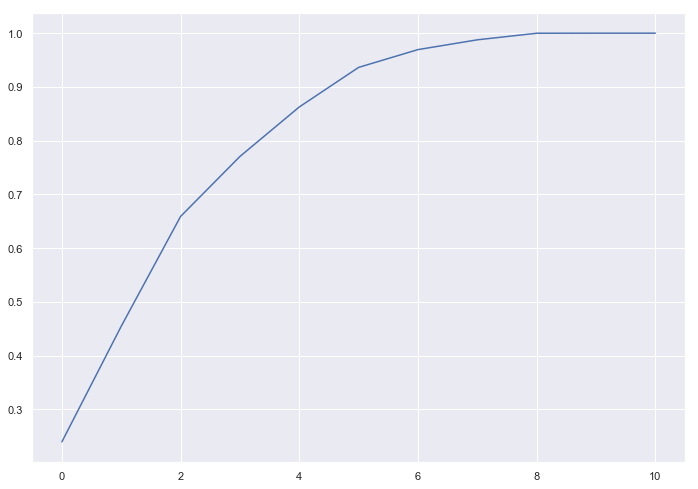

In [26]:
#kumulativna varijansa koju objasnjavaju komponente (od 0 do 1)
plt.plot(cum_var)
plt.show()

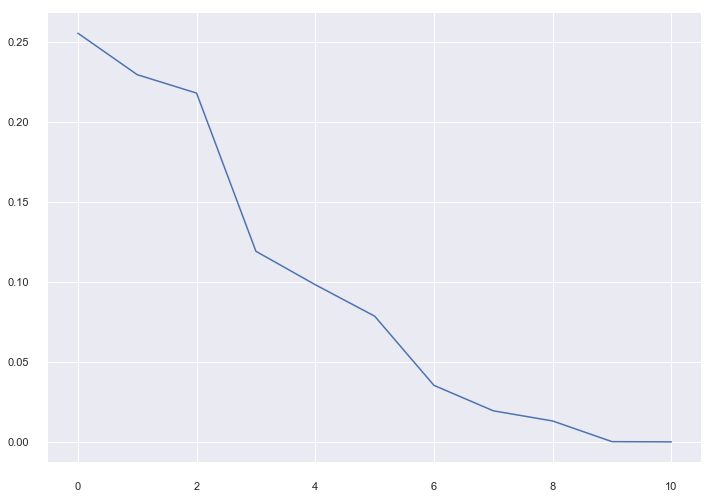

In [27]:
#koliko koja komponenta objasnjava varijansu
plt.plot(pca.explained_variance_, scalex=True)
sns.despine(offset=10, trim=True)

In [28]:
#vidimo da 6 komponenti objasnjavaju najveci deo varijanse, pa zato nadalje uzimamo samo tih 6 komponenti
pca.n_components = 6
pca.components_[0:6, :]

array([[-3.02277082e-01,  9.04244129e-01, -2.39786133e-01,
        -2.22044605e-16,  1.97467240e-02, -1.03974786e-01,
        -3.21626384e-02, -7.61658133e-02, -7.35718692e-02,
        -8.94815487e-02,  4.49178013e-02],
       [-6.39089805e-01, -4.21456785e-01, -5.08617949e-01,
         0.00000000e+00,  3.49722934e-02, -1.63025237e-01,
        -1.66416583e-02, -2.36221322e-01, -2.26376031e-01,
        -9.30348693e-02,  1.07083335e-01],
       [ 1.57384080e-01, -2.33065616e-02,  1.36259553e-01,
         1.11022302e-16,  1.46896852e-02, -9.76897643e-01,
        -1.65031928e-02, -9.92385177e-03, -9.55963636e-03,
         1.28240748e-02, -3.08044875e-02],
       [ 3.52516534e-02,  8.37695517e-03,  7.75740952e-02,
        -4.85722573e-17,  9.76057375e-01,  3.00945672e-02,
         1.47194432e-01, -8.85611718e-02, -8.56703837e-02,
         4.19158961e-02,  2.16814687e-02],
       [ 3.90924637e-02,  5.45458801e-02,  9.27907353e-02,
         6.93889390e-17, -1.99877683e-01,  1.34161785e-02,
  

In [29]:
#transformisemo i train i test set
train_pca=pca.fit_transform(X_train)
test_pca=pca.fit_transform(X_holdout)

In [30]:
#prebacujemo ih u dataframe
train_pca_frame=pd.DataFrame(train_pca, columns= range(1,7))
test_pca_frame=pd.DataFrame(test_pca, columns= range(1,7))

## Klasterovanje

In [31]:
#isprobavanje razlicith k vrednosti
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(X_train)
    cluste_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ 

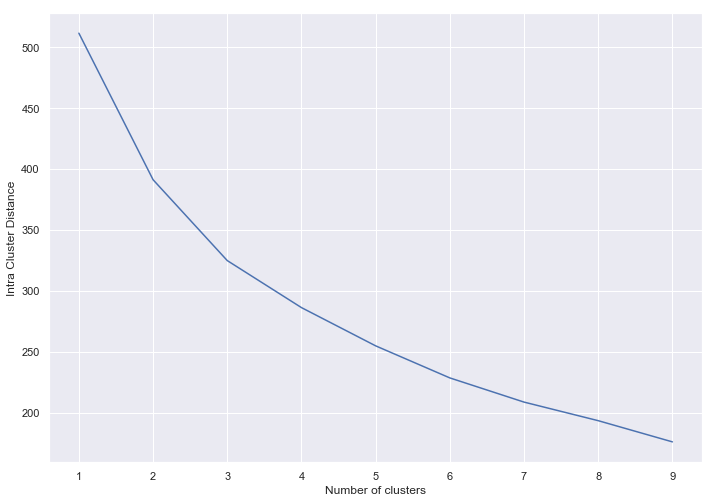

In [32]:
#gledamo koliko su klasteri udaljeni jedni od drugih
plt.close()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()

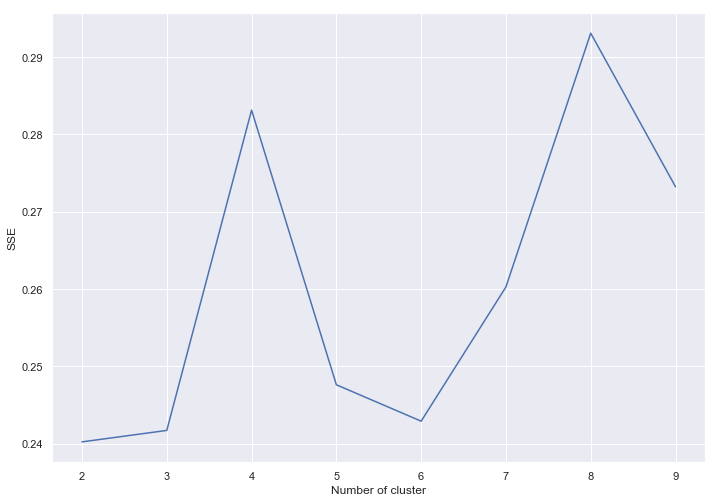

In [33]:
#gledamo silhouette score (koliko su dobro elementi rasporedjeni po klasterima)
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(X_train)
    cluster_labels = kmeans.fit_predict(X_train)
    sse[k] = silhouette_score(X_train, cluster_labels)

plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [34]:
#vidimo da su elementi najbolje rasporedjeni kad imamo 4 klastera, tako da uzimamo da je k = 4 i kreiramo model

kmeans_algorithm = KMeans(n_clusters = 4, max_iter = 100) 

cluster_model_normalized = kmeans_algorithm.fit(X_train)

clusters_normalized_test = cluster_model_normalized.predict(X_holdout)
clusters_normalized_train = cluster_model_normalized.predict(X_train)

In [35]:
train_cluster_frame=pd.DataFrame(X_train, columns= range(1,12))
test_cluster_frame=pd.DataFrame(X_holdout, columns= range(1,12))

In [36]:
train_cluster_frame.columns=data.columns
test_cluster_frame.columns=data.columns

In [37]:
train_cluster_frame.head()

season   yr      mnth  holiday   weekday  workingday  weathersit  \
0  0.333333  1.0  0.272727      0.0  0.166667         1.0         0.5   
1  0.000000  1.0  0.181818      0.0  0.833333         1.0         0.5   
2  1.000000  1.0  0.727273      0.0  0.500000         1.0         0.0   
3  1.000000  1.0  0.818182      0.0  1.000000         0.0         0.0   
4  0.000000  1.0  0.000000      0.0  0.833333         1.0         0.5   

       temp     atemp       hum  windspeed  
0  0.504695  0.496998  0.422249   0.373225  
1  0.366591  0.368552  0.547249   0.306370  
2  0.717562  0.679346  0.509569   0.555183  
3  0.416433  0.409971  0.313995   0.309466  
4  0.455891  0.441457  0.668062   0.800922

In [38]:
test_cluster_frame['Cluster'] = clusters_normalized_test
train_cluster_frame['Cluster'] = clusters_normalized_train

In [39]:
test_cluster_frame.head()

season   yr      mnth  holiday   weekday  workingday  weathersit  \
0  0.000000  0.0  0.181818      0.0  0.000000         0.0         0.5   
1  1.000000  1.0  1.000000      0.0  0.000000         0.0         0.5   
2  0.333333  1.0  0.272727      0.0  0.166667         1.0         0.0   
3  0.333333  1.0  0.363636      0.0  0.833333         1.0         0.0   
4  1.000000  1.0  0.818182      0.0  0.166667         1.0         0.5   

       temp     atemp       hum  windspeed  Cluster  
0  0.395486  0.376966  0.965207   0.802472        0  
1  0.405012  0.408330  0.903709   0.339057        3  
2  0.535847  0.521862  0.059809   0.839756        1  
3  0.708216  0.671869  0.659690   0.351468        1  
4  0.575304  0.568280  0.535886   0.171081        1

In [40]:
#zapisujemo test klastere
cluster0_test = test_cluster_frame[test_cluster_frame['Cluster']==0]
cluster1_test = test_cluster_frame[test_cluster_frame['Cluster']==1]
cluster2_test = test_cluster_frame[test_cluster_frame['Cluster']==2]
cluster3_test = test_cluster_frame[test_cluster_frame['Cluster']==3]

In [41]:
#zapicujemo train klastere
cluster0_train = train_cluster_frame[train_cluster_frame['Cluster']==0]
cluster1_train = train_cluster_frame[train_cluster_frame['Cluster']==1]
cluster2_train = train_cluster_frame[train_cluster_frame['Cluster']==2]
cluster3_train = train_cluster_frame[train_cluster_frame['Cluster']==3]

In [42]:
#deskriptivna statistika prvog klastera
test_cluster_frame[test_cluster_frame['Cluster']==0].describe()

season    yr       mnth  holiday    weekday  workingday  weathersit  \
count  29.000000  29.0  29.000000     29.0  29.000000   29.000000   29.000000   
mean    0.057471   0.0   0.125392      0.0   0.505747    0.793103    0.224138   
std     0.128142   0.0   0.101389      0.0   0.313337    0.412251    0.253060   
min     0.000000   0.0   0.000000      0.0   0.000000    0.000000    0.000000   
25%     0.000000   0.0   0.090909      0.0   0.333333    1.000000    0.000000   
50%     0.000000   0.0   0.090909      0.0   0.500000    1.000000    0.000000   
75%     0.000000   0.0   0.181818      0.0   0.833333    1.000000    0.500000   
max     0.333333   0.0   0.363636      0.0   1.000000    1.000000    0.500000   

            temp      atemp        hum  windspeed  Cluster  
count  29.000000  29.000000  29.000000  29.000000     29.0  
mean    0.296047   0.285315   0.473213   0.518905      0.0  
std     0.135016   0.135780   0.223666   0.183322      0.0  
min     0.094267   0.085601   0.061005   0.228680      0.0  
25%     0.189616   0.184596   0.314282   0.412121      0.0  
50%     0.294718   0.293151   0.450957   0.508554      0.0  
75%     0.380316   0.360541   0.605107   0.606510      0.0  
max     0.576343   0.568257   0.965207   0.849143      0.0

In [43]:
#deskriptivna statistika drugog klastera
test_cluster_frame[test_cluster_frame['Cluster']==1].describe()

season    yr       mnth  holiday    weekday  workingday  weathersit  \
count  91.000000  91.0  91.000000     91.0  91.000000        91.0   91.000000   
mean    0.560440   1.0   0.537463      0.0   0.514652         1.0    0.181319   
std     0.368109   0.0   0.313354      0.0   0.232602         0.0    0.252944   
min     0.000000   1.0   0.000000      0.0   0.166667         1.0    0.000000   
25%     0.333333   1.0   0.272727      0.0   0.333333         1.0    0.000000   
50%     0.666667   1.0   0.636364      0.0   0.500000         1.0    0.000000   
75%     1.000000   1.0   0.818182      0.0   0.666667         1.0    0.500000   
max     1.000000   1.0   1.000000      0.0   0.833333         1.0    1.000000   

            temp      atemp        hum  windspeed  Cluster  
count  91.000000  91.000000  91.000000  91.000000     91.0  
mean    0.562920   0.532295   0.467636   0.398095      1.0  
std     0.228384   0.212948   0.195062   0.189806      0.0  
min     0.197336   0.185427   0.020335   0.060663      1.0  
25%     0.347901   0.342028   0.333733   0.272944      1.0  
50%     0.604379   0.568280   0.460527   0.360794      1.0  
75%     0.793882   0.738993   0.595096   0.482099      1.0  
max     0.958464   0.895607   0.912081   0.981307      1.0

In [44]:
#deskriptivna statistika treceg klastera
test_cluster_frame[test_cluster_frame['Cluster']==2].describe()

season    yr       mnth  holiday    weekday  workingday  weathersit  \
count  47.000000  47.0  47.000000     47.0  47.000000        47.0   47.000000   
mean    0.695035   0.0   0.678917      0.0   0.500000         1.0    0.265957   
std     0.285137   0.0   0.221752      0.0   0.199637         0.0    0.310173   
min     0.000000   0.0   0.272727      0.0   0.166667         1.0    0.000000   
25%     0.666667   0.0   0.545455      0.0   0.333333         1.0    0.000000   
50%     0.666667   0.0   0.636364      0.0   0.500000         1.0    0.000000   
75%     1.000000   0.0   0.909091      0.0   0.666667         1.0    0.500000   
max     1.000000   0.0   1.000000      0.0   0.833333         1.0    1.000000   

            temp      atemp        hum  windspeed  Cluster  
count  47.000000  47.000000  47.000000  47.000000     47.0  
mean    0.649293   0.617873   0.605486   0.406165      2.0  
std     0.184216   0.167700   0.194818   0.207975      0.0  
min     0.315711   0.297291   0.041866   0.062226      2.0  
25%     0.486523   0.475025   0.490431   0.262076      2.0  
50%     0.685373   0.625197   0.604665   0.416810      2.0  
75%     0.813092   0.749779   0.715312   0.520204      2.0  
max     0.941851   0.980934   1.000000   1.000000      2.0

In [45]:
#deskriptivna statistika cetvrtog klastera
test_cluster_frame[test_cluster_frame['Cluster']==3].describe()

season         yr       mnth  holiday    weekday  workingday  \
count  40.000000  40.000000  40.000000     40.0  40.000000        40.0   
mean    0.566667   0.550000   0.568182      0.0   0.350000         0.0   
std     0.347560   0.503831   0.286557      0.0   0.483046         0.0   
min     0.000000   0.000000   0.000000      0.0   0.000000         0.0   
25%     0.333333   0.000000   0.363636      0.0   0.000000         0.0   
50%     0.666667   1.000000   0.545455      0.0   0.000000         0.0   
75%     1.000000   1.000000   0.818182      0.0   1.000000         0.0   
max     1.000000   1.000000   1.000000      0.0   1.000000         0.0   

       weathersit       temp      atemp        hum  windspeed  Cluster  
count   40.000000  40.000000  40.000000  40.000000  40.000000     40.0  
mean     0.162500   0.571475   0.547726   0.509140   0.448900      3.0  
std      0.262813   0.200313   0.185898   0.195393   0.170924      0.0  
min      0.000000   0.223295   0.200348   0.192584   0.183533      3.0  
25%      0.000000   0.416693   0.408119   0.344348   0.338666      3.0  
50%      0.000000   0.565959   0.557076   0.458434   0.421446      3.0  
75%      0.500000   0.723273   0.677256   0.635765   0.538855      3.0  
max      1.000000   0.951196   0.933712   0.903709   0.939315      3.0

In [46]:
#centroidi
centers_normalized = cluster_model_normalized.cluster_centers_
centers_normalized

array([[ 9.95670996e-02, -8.32667268e-16,  1.80637544e-01,
         0.00000000e+00,  5.19480519e-01,  7.53246753e-01,
         2.01298701e-01,  2.98871049e-01,  2.87472734e-01,
         4.37237814e-01,  4.84236835e-01],
       [ 4.74025974e-01,  1.00000000e+00,  4.81700118e-01,
         0.00000000e+00,  5.04329004e-01,  1.00000000e+00,
         1.88311688e-01,  5.64720511e-01,  5.40543645e-01,
         4.92031418e-01,  4.12774822e-01],
       [ 7.06896552e-01, -1.05471187e-15,  6.52037618e-01,
         0.00000000e+00,  4.95689655e-01,  1.00000000e+00,
         2.06896552e-01,  6.64506256e-01,  6.33802716e-01,
         5.59896016e-01,  3.81782266e-01],
       [ 5.59701493e-01,  5.52238806e-01,  5.61058345e-01,
         0.00000000e+00,  5.22388060e-01,  3.33066907e-16,
         1.90298507e-01,  5.54380709e-01,  5.28897873e-01,
         5.19071254e-01,  4.01217490e-01]])

In [47]:
#treba prokomentarisati svaki klaster

## Prediktivni modeli

### Linearna regresija

In [48]:
linear_regression = linear_model.LinearRegression() 
linear_regression.fit(X_train, y_train) #treniramo nad train setom
y_pred = linear_regression.predict(X_holdout) #predvidjamo nad test setom

In [49]:
pred = linear_regression.predict(X_train)
error = sqrt(mean_squared_error(y_train,pred)) #calculate rmse
print('RMSE value is:', error)

RMSE value is: 835.1165863335284


### Drvo odlucivanja

In [64]:
# Fit regression model
dt_regression = DecisionTreeRegressor()
dt_regression.fit(X_train, y_train)


# Predict
y_1 = dt_regression.predict(X_holdout)
y_2 = dt_regression.predict(X_train)

error_on_test = sqrt(mean_squared_error(y_holdout,y_1))
error_on_train = sqrt(mean_squared_error(y_train,y_2))
print('RMSE value on test is:', error_on_test)
print('RMSE value on train is:', error_on_train)

RMSE value on test is: 969.3352346332249
RMSE value on train is: 0.0


### KNN

In [51]:

rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train) #fitujemo model
    pred=model.predict(X_holdout) #pravimo predikcije nad test setom
    error = sqrt(mean_squared_error(y_holdout,pred)) #racunam rmse
    rmse_val.append(error) #sacuvaj rmse vrednosti
    print('RMSE value for k= ' , K , 'is:', error)
#y = train['cnt']
#train_new = train.drop(columns=['cnt'])
#knn.fit(train_new, y)
#y_holdout = test['cnt']
#test_new = test.drop(columns=['cnt'])
#knn_pred = knn.predict(test_new)
#print(accuracy_score(y_holdout, knn_pred)) #preciznost predikcije na test setu


RMSE value for k=  1 is: 966.5985233353141
RMSE value for k=  2 is: 922.1880512847513
RMSE value for k=  3 is: 903.1808824302842
RMSE value for k=  4 is: 895.2687720539435
RMSE value for k=  5 is: 915.614179024614
RMSE value for k=  6 is: 884.9619381142312
RMSE value for k=  7 is: 912.7764452494748
RMSE value for k=  8 is: 914.8806935463842
RMSE value for k=  9 is: 929.9466301651764
RMSE value for k=  10 is: 930.2971618119461
RMSE value for k=  11 is: 937.9606580190534
RMSE value for k=  12 is: 948.817232629825
RMSE value for k=  13 is: 957.9556284648772
RMSE value for k=  14 is: 981.3300771023843
RMSE value for k=  15 is: 977.237374499749
RMSE value for k=  16 is: 984.2293674766274
RMSE value for k=  17 is: 990.4482844089985
RMSE value for k=  18 is: 976.1462825642053
RMSE value for k=  19 is: 984.9460127941804
RMSE value for k=  20 is: 994.1698270780822


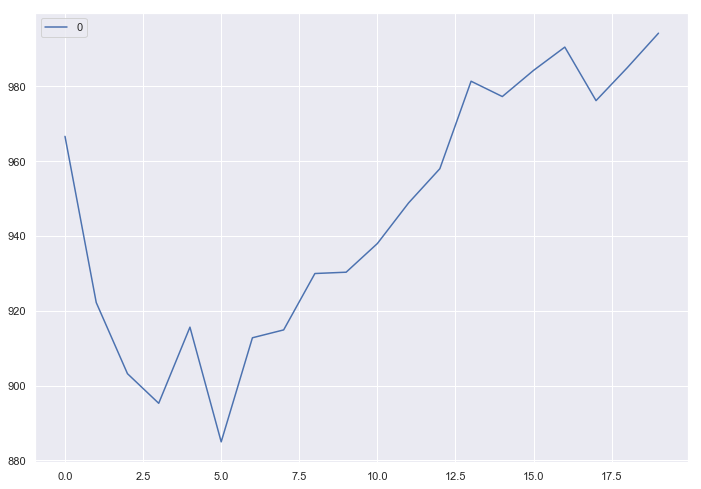

In [52]:
#rmse vrednosti u odnosu na k
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [53]:
#zakljucili smo da je najbolje da je n=5
knn = neighbors.KNeighborsRegressor(n_neighbors = 5)

## Pipeline sa prediktivnim modelima i kros-validacijom

In [54]:
pipe1 = Pipeline([('PCA', decomposition.PCA(.98)),
                   ('regression', linear_model.LinearRegression())])

pipe2 = Pipeline([('PCA', decomposition.PCA(.98)),
                   ('knn', neighbors.KNeighborsRegressor(n_neighbors = 5))])

pipe3 = Pipeline([('PCA', decomposition.PCA(.98)),
                   ('decision_tree', DecisionTreeRegressor(max_depth=5))])

In [55]:
print("LR: ", cross_val_score(pipe1, X_train,y_train, scoring='r2').mean())
print("KNN: ", cross_val_score(pipe2, X_train,y_train, scoring='r2').mean())
print("DT: ", cross_val_score(pipe3, X_train,y_train, scoring='r2').mean())

LR:  0.7821823759124126
KNN:  0.7445661326569133
DT:  0.6301718054123787


### Automatizovani pipeline

In [65]:
dict = {'regression':linear_model.LinearRegression(), 'knn':neighbors.KNeighborsRegressor(n_neighbors = 5),
       'decision_tree':DecisionTreeRegressor(max_depth=5)}

In [67]:
for key, value in dict.items():
    pipe = Pipeline([('PCA', decomposition.PCA(.98)),
                    (key, value)])
    print(key)
    print("R2:", cross_val_score(pipe, X_train,y_train, scoring='r2').mean())
    print("MSE:", cross_val_score(pipe, X_train,y_train, scoring='neg_mean_squared_error').mean())
    print()

regression
R2: 0.7821823759124126
MSE: -763693.9716887722

knn
R2: 0.7445661326569133
MSE: -899025.6237365425

decision_tree
R2: 0.6063088071827609
MSE: -1338648.9502081878



## Drvo odlučivanja sa izmenjenim parametrima

In [63]:
dt_regression_better = DecisionTreeRegressor(max_depth=50, min_samples_split=100, random_state=2019)
dt_regression_better.fit(X_train, y_train)  
pred=dt_regression_better.predict(X_holdout)
error_new_params = sqrt(mean_squared_error(y_holdout,pred))
print('RMSE value is:', error_new_params)

RMSE value is: 1053.2617256712556


## Linear Regression on clusters

#### Test i train prvog klastera

In [68]:
y0_test=pd.DataFrame(y_holdout)
y0_test['Cluster']=clusters_normalized_test
y0_test=y0_test[y0_test['Cluster']==0]
y0_test=y0_test.drop('Cluster',axis=1)

In [69]:
y0_train=pd.DataFrame(y_train)
y0_train['Cluster']=clusters_normalized_train
y0_train=y0_train[y0_train['Cluster']==0]
y0_train=y0_train.drop('Cluster',axis=1)

In [70]:
#LR za train
linear_regression = linear_model.LinearRegression() 
linear_regression.fit(X_train, y_train) 
y_pred = linear_regression.predict(cluster0_train.iloc[:, :-1])
error_train0 = sqrt(mean_squared_error(y0_train,y_pred))
print('RMSE value on train0 is:', error_train0)

RMSE value on train0 is: 430.14282764832984


In [71]:
#LR za test
y_pred = linear_regression.predict(cluster0_test.iloc[:, :-1])
error_test0 = sqrt(mean_squared_error(y0_test,y_pred))
print('RMSE value on test0 is:', error_test0)

RMSE value on test0 is: 532.4271978271931


#### Test i train drugog klastera

In [72]:
y1_test=pd.DataFrame(y_holdout)
y1_test['Cluster']=clusters_normalized_test
y1_test=y1_test[y1_test['Cluster']==1]
y1_test=y1_test.drop('Cluster',axis=1)

y1_train=pd.DataFrame(y_train)
y1_train['Cluster']=clusters_normalized_train
y1_train=y1_train[y1_train['Cluster']==1]
y1_train=y1_train.drop('Cluster',axis=1)

In [73]:
#LR za train
y_pred = linear_regression.predict(cluster1_train.iloc[:, :-1])
error_train1 = sqrt(mean_squared_error(y1_train,y_pred))
print('RMSE value on train1 is:', error_train1)

#LR za test
y_pred = linear_regression.predict(cluster1_test.iloc[:, :-1])
error_test1 = sqrt(mean_squared_error(y1_test,y_pred))
print('RMSE value on test1 is:', error_test1)

RMSE value on train1 is: 893.4123551899621
RMSE value on test1 is: 911.6051817124694


#### Train i test treceg klastera

In [74]:
y2_test=pd.DataFrame(y_holdout)
y2_test['Cluster']=clusters_normalized_test
y2_test=y2_test[y2_test['Cluster']==2]
y2_test=y2_test.drop('Cluster',axis=1)

y2_train=pd.DataFrame(y_train)
y2_train['Cluster']=clusters_normalized_train
y2_train=y2_train[y2_train['Cluster']==2]
y2_train=y2_train.drop('Cluster',axis=1)

In [75]:
#LR za train
y_pred = linear_regression.predict(cluster2_train.iloc[:,:-1])
error_train2 = sqrt(mean_squared_error(y2_train,y_pred))
print('RMSE value on train2 is:', error_train2)

#LR za test
y_pred = linear_regression.predict(cluster2_test.iloc[:,:-1])
error_test2 = sqrt(mean_squared_error(y2_test,y_pred))
print('RMSE value on test2 is:', error_test2)

RMSE value on train2 is: 734.3094228137469
RMSE value on test2 is: 706.6241470240416


#### Train i test cetvrtog klastera

In [76]:
y3_test=pd.DataFrame(y_holdout)
y3_test['Cluster']=clusters_normalized_test
y3_test=y3_test[y3_test['Cluster']==3]
y3_test=y3_test.drop('Cluster',axis=1)

y3_train=pd.DataFrame(y_train)
y3_train['Cluster']=clusters_normalized_train
y3_train=y3_train[y3_train['Cluster']==3]
y3_train=y3_train.drop('Cluster',axis=1)

In [77]:
#LR za train
y_pred = linear_regression.predict(cluster3_train.iloc[:,:-1])
error_train3 = sqrt(mean_squared_error(y3_train,y_pred))
print('RMSE value on train3 is:', error_train3)

#LR za test
y_pred = linear_regression.predict(cluster3_test.iloc[:,:-1])
error_test3 = sqrt(mean_squared_error(y3_test,y_pred))
print('RMSE value on test3 is:', error_test3)

RMSE value on train3 is: 1006.4832231611188
RMSE value on test3 is: 1188.2131549663045


In [78]:
errors = pd.DataFrame({'dataset': ['error_on_train','error_on_test', 'error_new_params', 'error_train0', 'error_test0', 'error_train1', 'error_test1', 'error_train2', 'error_test2', 'error_train3', 'error_test3' ],
                      'RMSE':[error_on_train, error_on_test, error_new_params,error_train0, error_test0, error_train1, error_test1, error_train2, error_test2, error_train3, error_test3]})

In [81]:
errors

dataset         RMSE
0     error_on_train     0.000000
1      error_on_test   969.335235
2   error_new_params  1053.261726
3       error_train0   430.142828
4        error_test0   532.427198
5       error_train1   893.412355
6        error_test1   911.605182
7       error_train2   734.309423
8        error_test2   706.624147
9       error_train3  1006.483223
10       error_test3  1188.213155

In [82]:
#vidimo da je greska na trening setu 0, a na test setu 969, sto govori da je nas model overfitt-ovan

#takodje, vidimo da se sa promenjenim parametrima greska povecava, sto znaci da model bolje radi sa default-nim parametrima

#dalje vidimo da je greska najmanja kada se model pokrece nad prvim klasterom